In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./Resources/Mouse_metadata.csv"
study_results_path = "./Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# merge on Mouse ID and Timepoint
study_dup = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview
study_dup.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice.
mice_cnt = study_dup['Mouse ID'].nunique()
print('Number of unique mice: ' + str(mice_cnt))

Number of unique mice: 249


In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_dups = study_dup[study_dup.duplicated(['Mouse ID','Timepoint'])].sort_values(by=['Mouse ID','Timepoint'])
mice_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
 # Optional: Get all the data for the duplicate mouse ID.
all_mice_dups = pd.merge(study_dup, mice_dups, on=['Mouse ID','Timepoint'], how='inner')
all_mice_dups

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,g989,Propriva,Female,21,26,0,45.000000,0,Propriva,Female,21,26,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0,Propriva,Female,21,26,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0,Propriva,Female,21,26,47.570392,0
3,g989,Propriva,Female,21,26,5,47.570392,0,Propriva,Female,21,26,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0,Propriva,Female,21,26,49.880528,0
5,g989,Propriva,Female,21,26,10,49.880528,0,Propriva,Female,21,26,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1,Propriva,Female,21,26,53.442020,0
7,g989,Propriva,Female,21,26,15,53.442020,0,Propriva,Female,21,26,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1,Propriva,Female,21,26,54.657650,1
9,g989,Propriva,Female,21,26,20,54.657650,1,Propriva,Female,21,26,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study = study_dup.drop_duplicates()
study.head() 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice in the clean DataFrame.
mice_cnt_nodups = study['Mouse ID'].nunique()
print('Number of unique mice: ' + str(mice_cnt_nodups))

Number of unique mice: 249


In [14]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
avgs = study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
vars = study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stds = study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
results = pd.merge(avgs, vars, on='Drug Regimen')
results = pd.merge(results, stds, on='Drug Regimen')
results = pd.merge(results, sems, on='Drug Regimen')

# change the column names
results.columns = ['Tumor Volume (mm3) - Mean','Tumor Volume (mm3) - Variance','Tumor Volume (mm3) - Std. Dev.','Tumor Volume (mm3) - Std. Error of the Mean']

results

,Tumor Volume (mm3) - Mean,Tumor Volume (mm3) - Variance,Tumor Volume (mm3) - Std. Dev.,Tumor Volume (mm3) - Std. Error of the Mean
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,7.821003,0.581331
Propriva,52.368318,42.278090,6.502160,0.514041
Ramicane,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
results_agg = study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','var','std','sem']})
results_agg


Tumor Volume (mm3)                               
                           mean        var       std       sem
Drug Regimen                                                  
Capomulin             40.675741  24.947764  4.994774  0.329346
Ceftamin              52.591172  39.290177  6.268188  0.469821
Infubinol             52.884795  43.128684  6.567243  0.492236
Ketapril              55.235638  68.553577  8.279709  0.603860
Naftisol              54.331565  66.173479  8.134708  0.596466
Placebo               54.033581  61.168083  7.821003  0.581331
Propriva              52.368318  42.278090  6.502160  0.514041
Ramicane              40.216745  23.486704  4.846308  0.320955
Stelasyn              54.233149  59.450562  7.710419  0.573111
Zoniferol             53.236507  48.533355  6.966589  0.516398

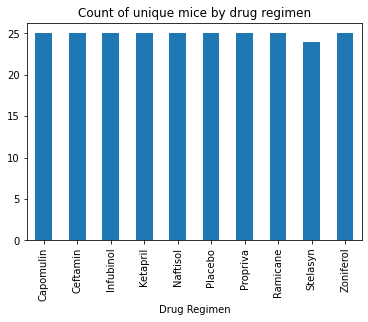

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drugregimen using pandas.
unique_mice_by_drug = study.groupby('Drug Regimen')['Mouse ID'].nunique().plot(kind='bar',x='Drug Regimen',title='Count of unique mice by drug regimen')

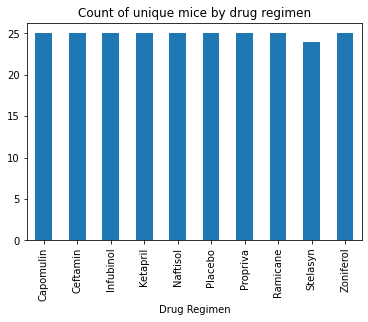

In [17]:
 # Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
study.groupby('Drug Regimen')['Mouse ID'].nunique().plot(kind='bar',x='Drug Regimen',title='Count of unique mice by drug regimen')
plt.show()    
    

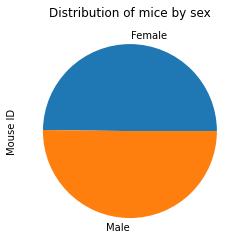

In [19]:
 # Generate a pie plot showing the distribution of female versus male mice using pandas
unique_mice_by_sex = study.groupby('Sex')['Mouse ID'].nunique().plot(kind='pie',x='Sex',y='Mouse ID',title='Distribution of mice by sex') 
    

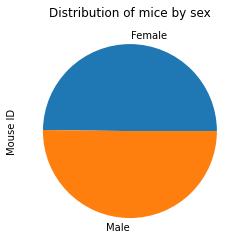

In [21]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot
study.groupby('Sex')['Mouse ID'].nunique().plot(kind='pie',x='Sex',y='Mouse ID',title='Distribution of mice by sex')
plt.show() 
    

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
keep = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_by_mouse_and_drug = study.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(max_timepoint_by_mouse_and_drug, study[['Drug Regimen','Mouse ID','Tumor Volume (mm3)']], on=['Drug Regimen','Mouse ID'], how='left')

# remove all but the four treatments of interest
final_tumor_vol_for_selected_drugs = final_tumor_vol[final_tumor_vol['Drug Regimen'].isin(keep)]

final_tumor_vol_for_selected_drugs


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,45.000000
1,Capomulin,b128,45,45.651331
2,Capomulin,b128,45,43.270852
3,Capomulin,b128,45,43.784893
4,Capomulin,b128,45,42.731552
...,...,...,...,...
1524,Ramicane,z578,45,37.414114
1525,Ramicane,z578,45,37.815935
1526,Ramicane,z578,45,38.504824
1527,Ramicane,z578,45,34.022093


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = study['Drug Regimen'].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_by_treatment = []

#create an empty dataframe for the upper and lower limits (for finding outliers by treatment in the study dataset)
treatment_limits = pd.DataFrame(columns=['Drug Regimen','Lower Limit','Upper Limit'])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_for_selected_treatment = study[study['Drug Regimen'].isin([treatment])]
    
    # Determine outliers using upper and lower bounds
    treatment_25pct = mice_for_selected_treatment['Tumor Volume (mm3)'].quantile(0.25)
    treatment_75pct = mice_for_selected_treatment['Tumor Volume (mm3)'].quantile(0.75)
    treatment_iqr = treatment_75pct - treatment_25pct
    treatment_lower_limit = treatment_25pct - 1.5 * treatment_iqr
    treatment_upper_limit = treatment_75pct + 1.5 * treatment_iqr
    # add a row for the treatment with the lower and upper limit (to merge into the study for outlier detection)
    treatment_limits = treatment_limits.append({'Drug Regimen':treatment,'Lower Limit':treatment_lower_limit,'Upper Limit':treatment_upper_limit},ignore_index=True)

# merge the lower and upper limits (1.5 x IQR under Q1, 1.5 x IQR over Q3) into the study dataframe
study_outliers = pd.merge(study, treatment_limits, on='Drug Regimen', how='left')

# define conditions to select outliers
condition1 = study_outliers['Tumor Volume (mm3)'] < study_outliers['Lower Limit']
condition2 = study_outliers['Tumor Volume (mm3)'] > study_outliers['Upper Limit']

# show the outliers (the | is 'or')
study_outliers = study_outliers.loc[condition1|condition2]
study_outliers

# since the outliers are just outside of limit, I'm not going to drop them from the study dataframe

    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Lower Limit,Upper Limit
9,k403,Ramicane,Male,21,16,45,22.050126,1,24.186586,57.488048
18,s185,Capomulin,Female,3,17,40,25.472143,1,26.714832,55.971101
19,s185,Capomulin,Female,3,17,45,23.343598,1,26.714832,55.971101
903,g570,Propriva,Male,16,29,45,70.492788,2,33.378436,69.988623
1178,m269,Stelasyn,Female,22,28,45,75.123690,1,32.038901,74.727535
1288,o562,Propriva,Female,4,25,40,71.172463,1,33.378436,69.988623
1289,o562,Propriva,Female,4,25,45,72.455421,2,33.378436,69.988623
1657,v991,Propriva,Female,10,30,45,70.167749,4,33.378436,69.988623


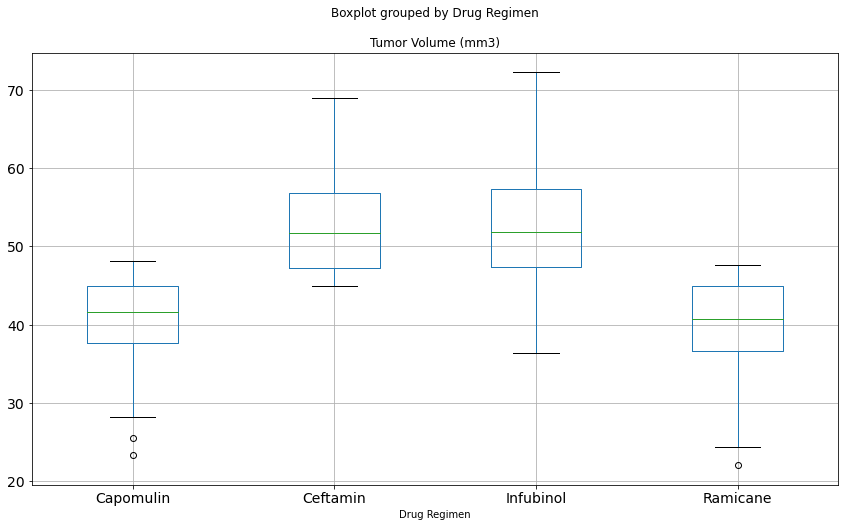

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = final_tumor_vol_for_selected_drugs.boxplot(column='Tumor Volume (mm3)',by='Drug Regimen',figsize=[14,8],fontsize=14)

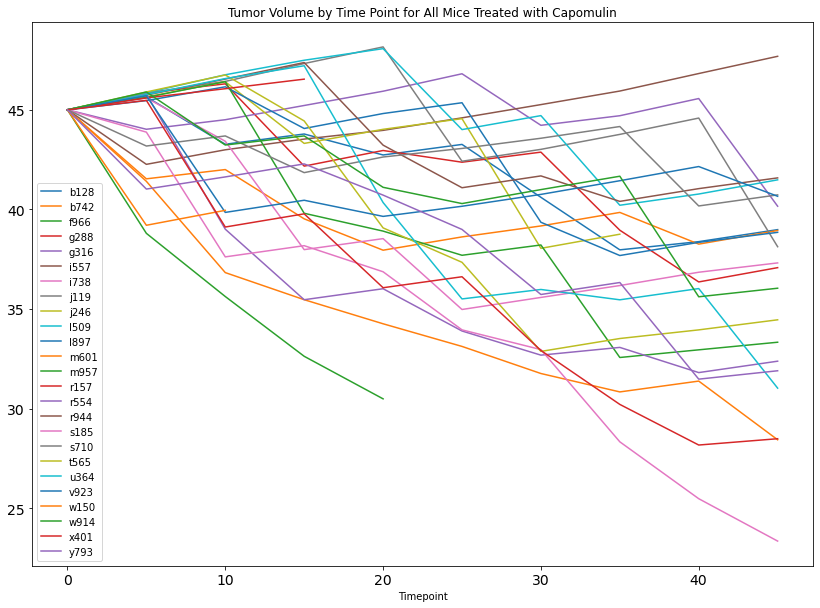

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice_by_mouseid_and_timepoint = study[study['Drug Regimen'].isin(['Capomulin'])].pivot(index='Timepoint',columns='Mouse ID',values='Tumor Volume (mm3)')
capomulin_mice_by_mouseid_and_timepoint.plot(title='Tumor Volume by Time Point for All Mice Treated with Capomulin',figsize=[14,10],fontsize=14,legend='left')
plt.legend(loc='lower left')
plt.show()



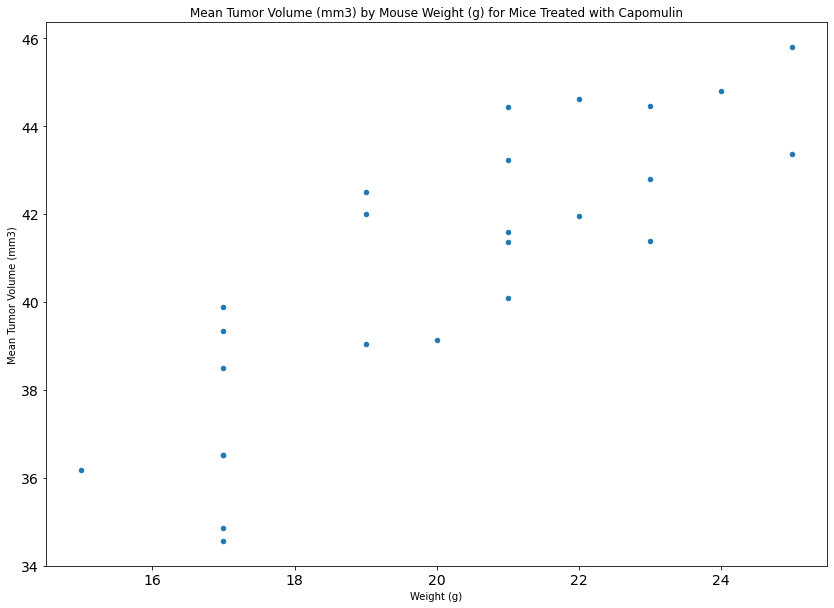

In [28]:
 # Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice = study[study['Drug Regimen'].isin(['Capomulin'])].groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()
capomulin_mice.columns = ['Mouse ID', 'Weight (g)', 'Mean Tumor Volume (mm3)']
capomulin_mice.plot(kind='scatter',x='Weight (g)',y='Mean Tumor Volume (mm3)',title='Mean Tumor Volume (mm3) by Mouse Weight (g) for Mice Treated with Capomulin',figsize=[14,10],fontsize=14,legend='left')
plt.show()    
        

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_mice['Mean Tumor Volume (mm3)'],capomulin_mice['Weight (g)'])
if intercept < 0:
    op = '-'
else:
    op = '+'

print('Correlation coefficient: '+str(round(r_value,4)) +'\n[Mean Tumor Volume (mm3)] = '+ str(round(slope,4)) +' * [Weight (g)] ' + op + ' ' + str(abs(round(intercept,4))))


Correlation coefficient: 0.8419
[Mean Tumor Volume (mm3)] = 0.7427 * [Weight (g)] - 10.1489
